# Исследование рынка игр

Интернет-магазин "Стримчик" продает компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Целью проекта является определение закономерностей, влияющих на успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В проекте используются данные до 2016 года. <br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
   - Name — название игры
   - Platform — платформа
   - Year_of_Release — год выпуска
   - Genre — жанр игры
   - NA_sales — продажи в Северной Америке (миллионы долларов)
   - EU_sales — продажи в Европе (миллионы долларов)
   - JP_sales — продажи в Японии (миллионы долларов)
   - Other_sales — продажи в других странах (миллионы долларов)
   - Critic_Score — оценка критиков (максимум 100)
   - User_Score — оценка пользователей (максимум 10)
   - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Общая информация о датасете
Импортируем необходимые библиотеки и откроем файл с данными для изучения.


In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# объявим переменную data и запишем в нее таблицу с данными. Просмотрим первые 5 строк.
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим общую информацию о датафрейме.

In [3]:
data.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Промежуточный вывод:**
Таблица содержит 16715 строк и 11 столбцов с данными. В 6 столбцах есть пропущенные значения. Некоторые типы данных не соответствуют данным в столбце. 

## Шаг 2. Предобработка данных

Выполним предобработку данных. <br>
1. Заменим названия столбцов
2. Преобразуем типы данных
3. Обработаем пропуски
4. Посчитаем суммарные продажи
5. Дубликаты

### Замена названий
Столбцы содержат заглавные буквы. Избавимся от них с помощью метода str.lower()

In [4]:
data.columns = data.columns.str.lower() # приведем названия столбцов к нижнему регистру
data.columns # выведем названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Типы данных

 Столбец `year_of_release` содержит тип данных float64, хотя в самом столбце - год выпуска, год не может быть не целым числом. Заменим тип данных на int.

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64') #поменяем тип данных
data['year_of_release'] #выведем столбец

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

### Обработка пропусков
Для начала посмотрим, сколько пропусков в каждом столбце.

In [6]:
data.isna().sum() #посчитаем, сколько пропущенных значений

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски есть в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. 

Пропуски в столбце с рейтингом ESRB скорее всего связаны с тем, что большинство игр было выпущено до того, как начала существовать организация, а также с тем, что эта организация Американская, и не все игры попадают в ее поле зрения и получают оценку.

Так как строки с пропусками в столбцах `name`, `year_of_release`, `genre` составляют всего 1,6%, было принято решение удалить их из датафрейма.
На дальнейшее исследование они не повлияют.


In [7]:
data.shape

(16715, 11)

In [8]:
data = data.dropna(subset=['name','year_of_release','genre']) #удалим пропуски в конкретных столбцах
data.isna().sum() #снова посчитаем пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [9]:
data.shape

(16444, 11)

Размер таблицы изменился ровно на то количество строк, которое удаляли

Посмотрим столбец `rating`. Здесь находятся оценки от ESRB.

In [10]:
data['rating'].unique() #уникальные значения столбца

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По информации https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board, обозначения в рейтинге означают:<br>
    «EC» («Early childhood») — «Для детей младшего возраста» <br>
    «E» («Everyone») — «Для всех»<br>
    «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»<br>
    «T» («Teen») — «Подросткам»<br>
    «M» («Mature») — «Для взрослых»<br>
    «AO» («Adults Only 18+») — «Только для взрослых»<br>
    «RP» («Rating Pending») — «Рейтинг ожидается»<br>
    «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+<br>
    
В нашем столбце есть и другие значения.<br>
«K-A» («Kids to Adults»)— «Для детей и взрослых». Этот рейтинг был заменён на «Everyone» 1 января 1998 года. В соответствии с этим заменим все "К-А" на "Е".<br>

Также заменим все пропущенные значения на 'RP' - рейтинг ожидается.

In [11]:
data['rating'] = data['rating'].replace('K-A', 'E') #заменим все "K-A" на "E"
data['rating'] = data['rating'].fillna('RP') #заменим пропуски на "RP"
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Пропуски в столбцах `critic_score`, `user_score` пока оставим без изменения. Удалять такие пропуски нельзя - потеряем почти половину датасета.

Обратим внимание на столбец `user_score`. В нем содержатся оценки пользователей: дробные числа, пропущенные значения и аббревиатура "tbd". 

In [12]:
data['user_score'].unique() #посмотрим уникальные значения

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)


**TBD** - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

В связи в этим можно заменить значения "tbd" в `user_score` на пропуск - игра еще не вышла, рейтинга пользователей еще нет.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN ) #заменим все "tbd" на пропуск
data['user_score'].unique() #посмотрим уникальные значения, убедимся, что замена произошла

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь можно поменять тип столбца с `object` на `float`.

In [14]:
data['user_score'] = data['user_score'].astype('float64') #поменяем тип
data['user_score'] #посмотрим столбец

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: float64

**Откуда взялись пропуски?** <br>
Вероятно, есть несколько возможных причин:
- Человеческий фактор: при заполнении таблицы случайно пропущены некоторые значения (например, год выпуска пропускали, если год выпуска равен текущему году)
- Технический фактор: при выгрузке таблицы произошел сбой
- ESRB еще не успела оценить игру, либо ее оценила другая организация, соответственно, значение пропущено
- Игра еще слишком малоизвестна - у нее нет рейтинга пользователей и оценки экспертов
- Дело во времени: ранее не было сервисов, которые собирали бы рейтинги игроков и рейтинги экспертов. Сюда же можно отнести и пропуски в ESRB.


### Суммарные продажи
Посчитаем все продажи по каждой игре и запишем их в отдельный столбец

In [15]:
#Объявим отдельный столбец "total_sales" и запишем в него сумму столбцов с продажами по регионам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
data.head() # посмотрим таблицу

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Дубликаты
Проверим датафрейм на явные и неявные дубликаты

In [16]:
data.duplicated().sum() #проверка на дубликаты строк

0

В таблице нет явных дубликатов строк.

Проверим неявные дубликаты в столбцах "genre", "platform"

In [17]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [18]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбцах нет неявных дубликатов.

In [19]:
data[data[['name', 'platform']].duplicated()] #проверка на дубликаты имя+платформа

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


На первый взгляд есть 3 дубликата. Посмотрим конкретно игру Madden NFL 13.

In [20]:
data[(data['name'] =='Madden NFL 13') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Это строки 604 и 16230. В строке 16230 нет продаж по Северной Америке и Японии, а значения в столбцах с годом выпуска, оценками и рейтингом совпадают. Так что удалим именно эту строку.

In [21]:
data = data.drop(index=[16230])

Также посмотрим на игру Need for Speed: Most Wanted

In [22]:
data[(data['name'] =='Need for Speed: Most Wanted') & ((data['platform'] == 'X360') | (data['platform'] == 'PC'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


Здесь игры различаются по году выпуска - скорее всего, разработчики перевыпускали одну и ту же игру на одной и той же платформе. Произошло это в одинаковые годы - выглядит вполне правдоподобно. Эти дубликаты удалять не будем.

### Промежуточный вывод:
В ходе предобработки данных были заменены названия всех столбцов на названия в нижнем регистре. Это было сделано для дальнейшего удобства пользования таблицей. Также изменены типы данных столбцов `year_of_release` и `user_score`. Были обработаны пропуски, и удалена 271 строка (1,6% от датасета). В столбце `user_score` значения `tbd` были заменены на пропуски. Были проведены проверки на явные и неявные дубликаты, в результате чего была удалена 1 строка. Также был создан отдельный столбец с суммарной продажей игры по всем регионам.

## Шаг 3. Исследовательский анализ


### Количество игр по годам
Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

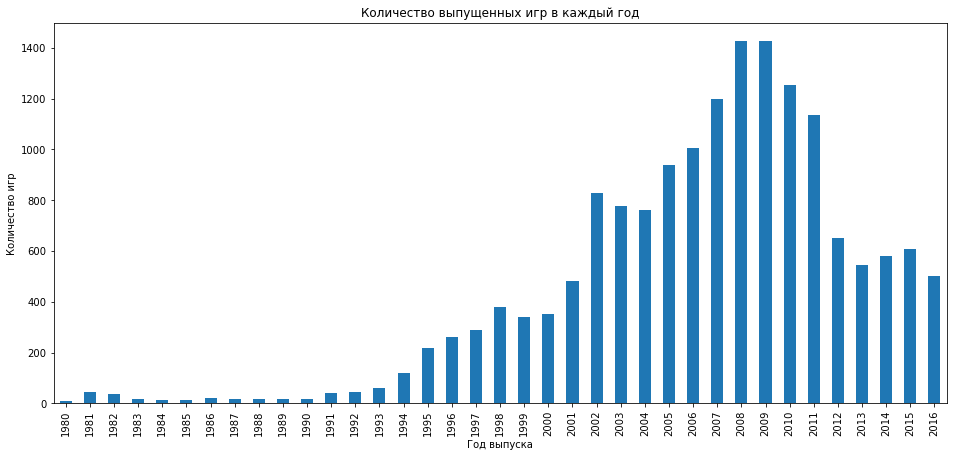

In [23]:
# группируем по году, считаем, выводим график
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize = (16,7),xlabel='Год выпуска', 
                                                     ylabel='Количество игр', 
                                                     title='Количество выпущенных игр в каждый год')
plt.show()

По данным видно, что подъем случился после 2002 года. 2008-2009 года являются пиковыми. После 2012 года произошел спад - скорее всего, интерес к играм упал.<br>
Для анализа нет необходимости учитывать все периоды.

### Продажи по платформам по годам
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
#группируем по платформам и сортируем по суммарным продажам
data.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values('total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберем платформы с суммарными продажами больше 600. Сюда войдут PS2, X360, PS3, Wii, DS, PS. Далее по суммарным продажам идет резкий обрыв, поэтому берем для анализа только 6 платформ.

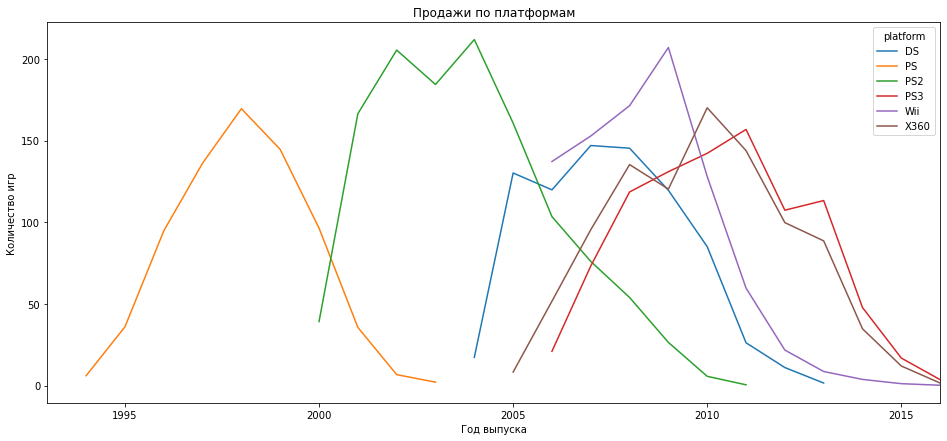

In [25]:
top_pltf = data[(data['platform'] == 'PS2') |
     (data['platform'] == 'X360') |
     (data['platform'] == 'PS3') |
     (data['platform'] == 'Wii') |
     (data['platform'] == 'DS') |
     (data['platform'] == 'PS')] # отбираем только топовые платформы
top_pltf.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum') \
    .plot(figsize=(16,7)) #формируем сводную таблицу и график
plt.xlabel('Год выпуска')
plt.title('Продажи по платформам')
plt.ylabel('Количество игр')
plt.xlim(1993,2016)
plt.show()

По графику видно, что у каждой из платформ есть жизненный цикл с характерным подъемом, пиком и спадом. Например, PS начала свою деятельность в 1994 году, пик пришелся на 1998 год, далее спад до 2003.<br>

Также интересно отметить, что большинство топовых платформ свой жизненный цикл проживали как раз в пик популярности и выхода новых игр (график выше).

В среднем платформы "живут" 10 лет. Далее неизбежно идет спад, так как с каждым годом технические характеристики и требования, улучшаются и платформа не может конкурировать с новыми платформами. Также возможной причиной может быть развитие информационных технологий, а вследствии и пиратства на рынке игр.

### Определение актуального периода
Для дальнейшего анализа необходимо выбрать актуальный период - на его основе и будут выявляться закономерности. По данным и графикам актуальным является период с 2014 года по 2016.

 - Игровая индустрия меняется быстрее, поэтому период нужно брать максимально короткий
 - Самые прибыльные платформы как раз либо отжили свой срок и их можно не учитывать, либо еще держатся
 
В соответствии с этим решением перезапишем датафрейм с условием `year_of_release >= 2014`

In [26]:
new_data = data[data['year_of_release'] >= 2014].reset_index() #перезаписываем таблицу с условием
new_data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1685,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1686,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
1687,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


### Текущие платформы-лидеры
Посмотрим, какие из платформ в данный момент находятся на пике, растут или падают.

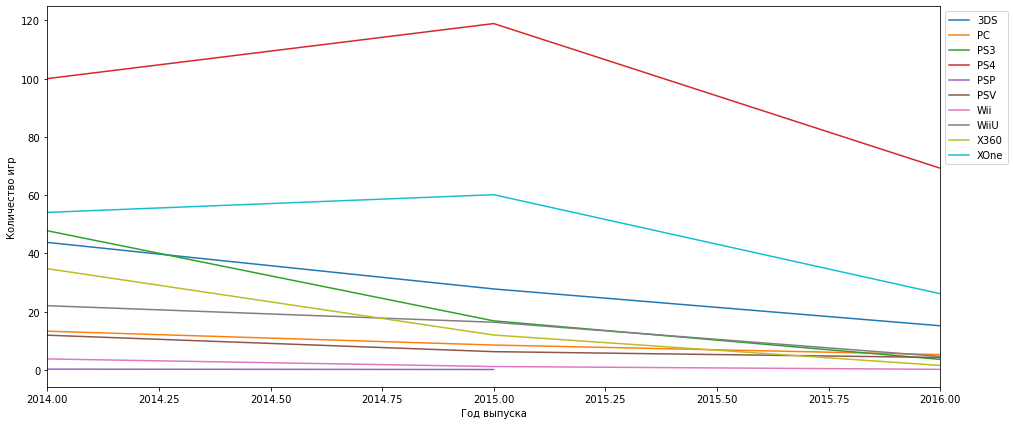

In [27]:
new_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum') \
    .plot(figsize=(16,7)) #сводная таблица по платформам и продажам в разрезе годов и график
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xlim(2014,2016)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

По графику видно, что ни одна из платформ на 2016 год не находится на пике и не растет.

На 2016 год лидерами по продажам являются: 
 - PS4
 - XOne
 - 3DS
 
Однако и они проживают стадию спада. Отсюда можно сделать вывод, что падают продажи не только по отдельным платформам, а по всему рынку игр. 

### Глобальные продажи в разбивке по платформам
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

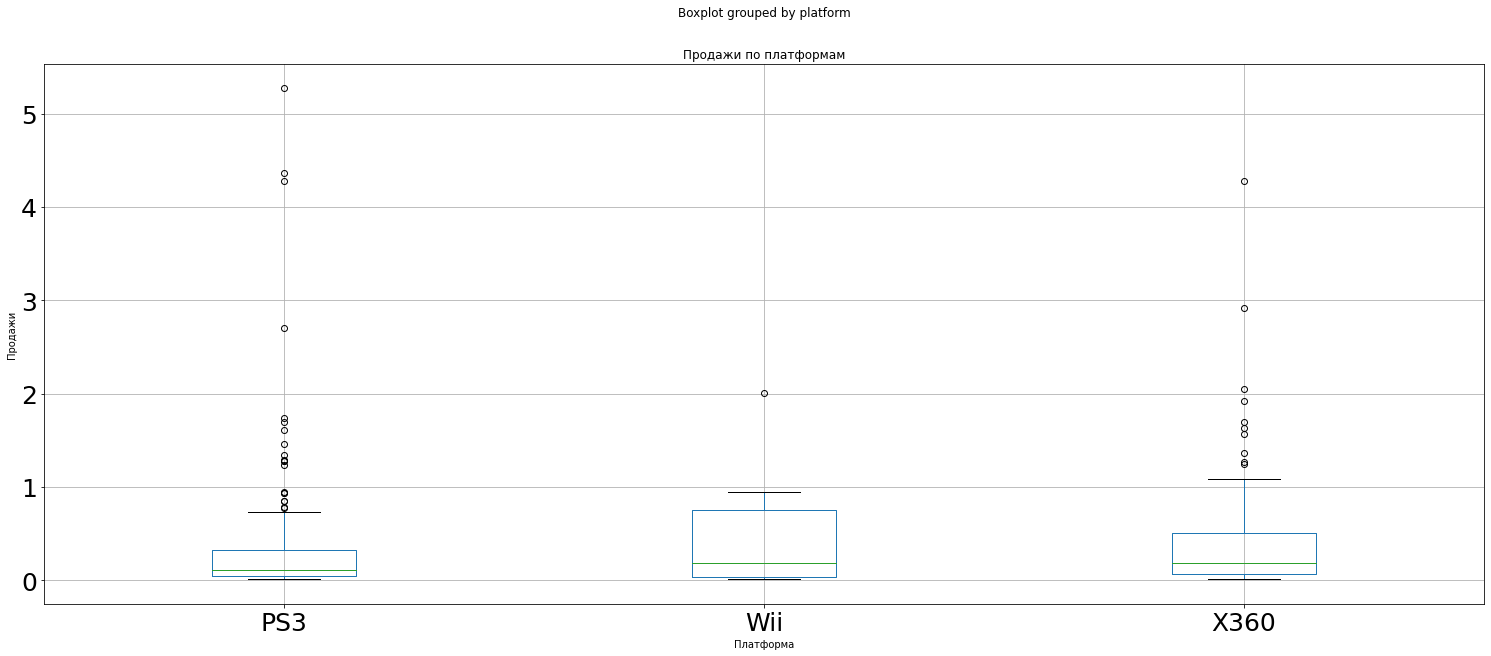

In [28]:
top_pltf_new = top_pltf[top_pltf['year_of_release'] >= 2014] #запрос из таблицы с условием
top_pltf_new.boxplot(column='total_sales', by='platform', fontsize=25, figsize=(25,10)) #ящик с усами
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам')
plt.show()

Посмотрим поближе, чтобы увидеть медианы.

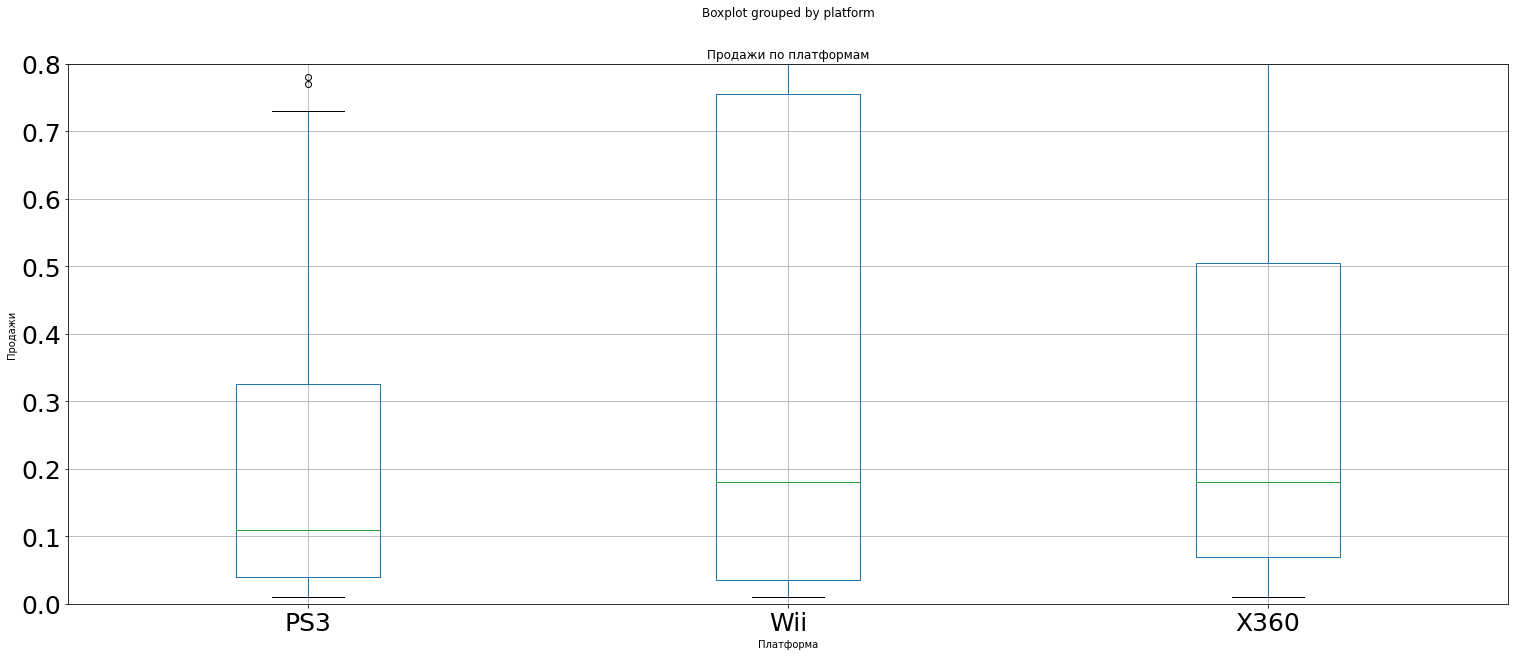

In [29]:
top_pltf_new.boxplot(column='total_sales', by='platform', fontsize=25, figsize=(25,10)) #ящик с усами поближе
plt.ylim([0, 0.8])
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи по платформам')
plt.show()

Из датасета с топовыми платформами пропала платформа PS, так как ее жизненный цикл закончился до актуального для нас периода.

В среднем продажи держатся около 0,35 миллионов копий. Медиана - 0,12. На диаграмме видны выбросы - возможно, платформа попала в топ именно из-за "выстрелившей" игры.

Убедимся в цифрах еще раз.

In [30]:
top_pltf_new['total_sales'].describe() #описание таблицы с топовыми платформами

count    341.000000
mean       0.356217
std        0.632537
min        0.010000
25%        0.040000
50%        0.120000
75%        0.410000
max        5.270000
Name: total_sales, dtype: float64

Посмотрим самые "топовые" игры для топовых платформ.

In [31]:
top_pltf_new[top_pltf_new['total_sales'] >=1.8] # самые прибыльные игры для топовых платформ

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,RP,5.27
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
494,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E,2.92
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,NaN,3.2,E,2.70
829,Madden NFL 15,X360,2014,Sports,1.77,0.06,0.00,0.22,NaN,5.5,E,2.05
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.00,0.17,NaN,8.4,E10+,2.01
898,Destiny,X360,2014,Shooter,1.31,0.43,0.00,0.18,NaN,4.7,T,1.92


### Оценка экспертов и пользователей
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Посмотрим на примере самых популярных на 2016 год платформ: PS4, XOne, 3DS.

In [32]:
PS4 = new_data[new_data['platform'] == 'PS4'] #новая переменная из новой таблицы с условием

#коэффициенты корреляции
print('Коэффициент корреляции для оценки критиков и продаж =', PS4['critic_score'].corr(PS4['total_sales']))
print('Коэффициент корреляции для оценки пользователей и продаж =', PS4['user_score'].corr(PS4['total_sales']))

Коэффициент корреляции для оценки критиков и продаж = 0.40266141068104083
Коэффициент корреляции для оценки пользователей и продаж = -0.040131589472697286


Коэффициент корреляции для оценки критиков и продаж = 0,4. Это средняя положительная связь. <br>
Коэффициент корреляции для оценки пользователей и продаж = -0.04. Это отрицательная крайне слабая связь.

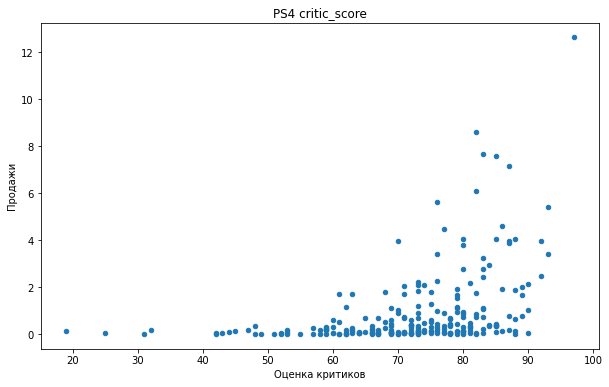

In [33]:
# диаграмма рассеяния
PS4.plot(kind='scatter', x='critic_score', y='total_sales', 
         figsize=(10,6), xlabel='Оценка критиков', ylabel='Продажи', 
         title='PS4 critic_score')
plt.show()

По диаграмме рассеяния видно, что чем выше оцениваеют игру, тем больше она приносит дохода. Это неудивительно, если оценка критиков высокая - игра качественная, соответственно, больше выручки приносит.

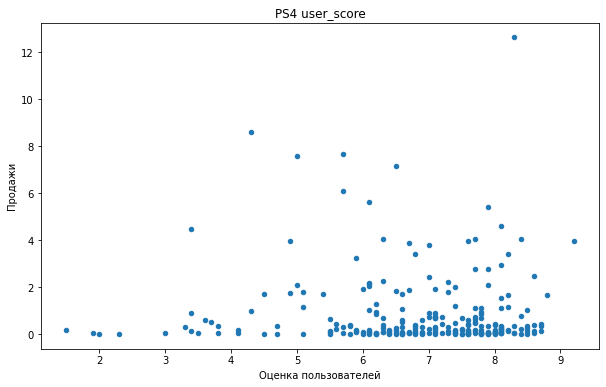

In [34]:
#диаграмма рассеяния
PS4.plot(kind='scatter', x='user_score', y='total_sales', 
         figsize=(10,6), xlabel='Оценка пользователей', ylabel='Продажи', 
         title='PS4 user_score')

plt.show()

По диаграмме видно, что нет тенденции к зависимости между оценкой пользователей и продажами.

Посмотрим на те же самые метрики для двух других платформ.

Коэффициент корреляции для оценки критиков и продаж = 0.428676943703332
Коэффициент корреляции для оценки пользователей и продаж = -0.07038392806475818


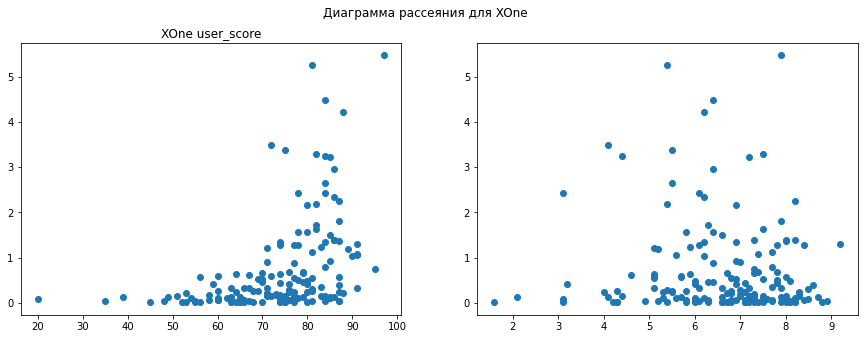

In [35]:
#новая переменная с условием по конкретной платформе
XOne = new_data[new_data['platform'] == 'XOne']
print('Коэффициент корреляции для оценки критиков и продаж =', XOne['critic_score'].corr(XOne['total_sales']))
print('Коэффициент корреляции для оценки пользователей и продаж =', XOne['user_score'].corr(XOne['total_sales']))

#вывод диаграмм рассеяния
fig, ax = plt.subplots(1, 2, figsize=[15,5])
fig.suptitle('Диаграмма рассеяния для XOne')

ax[0].plot(XOne['critic_score'], XOne['total_sales'], 'o')
ax[0].set_title('XOne critic_score')

ax[1].plot(XOne['user_score'], XOne['total_sales'], 'o')
ax[0].set_title('XOne user_score')

plt.show()

0,43 = средняя положительная связь. <br>
-0,07 = отрицательная крайне слабая связь.

Собственно, то же самое видно и на диаграммах рассеяния. Есть зависимость с оценкой критиков, нет зависимости с оценкой пользователей.

Посмотрим для 3DS.

Коэффициент корреляции для оценки критиков и продаж = 0.3141174928690509
Коэффициент корреляции для оценки пользователей и продаж = 0.2151932718527028


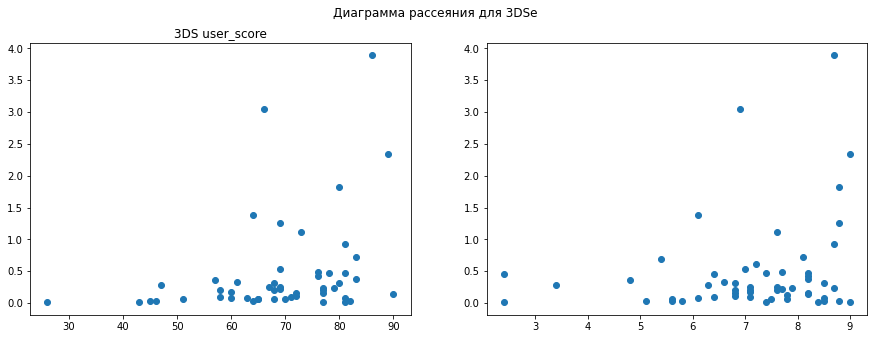

In [36]:
#новая переменная с условием по конкретной платформе
DS_3 = new_data[new_data['platform'] == '3DS']
print('Коэффициент корреляции для оценки критиков и продаж =', DS_3['critic_score'].corr(DS_3['total_sales']))
print('Коэффициент корреляции для оценки пользователей и продаж =', DS_3['user_score'].corr(DS_3['total_sales']))

#вывод графиков
fig, ax = plt.subplots(1, 2, figsize=[15,5])
fig.suptitle('Диаграмма рассеяния для 3DSe')

ax[0].plot(DS_3['critic_score'], DS_3['total_sales'], 'o')
ax[0].set_title('3DS critic_score')

ax[1].plot(DS_3['user_score'], DS_3['total_sales'], 'o')
ax[0].set_title('3DS user_score')

plt.show()

Для платформы 3DS немного другая ситуация: Коэффициент корреляции для оценки критиков и продаж = 0.314, слабая<br> 
а вот Коэффициент корреляции для оценки пользователей и продаж = 0.215 - положительная, но слабая связь.

Посмотрим на данные в общем. Что сильнее влияет на продажи: оценки пользователей или оценки экспертов?

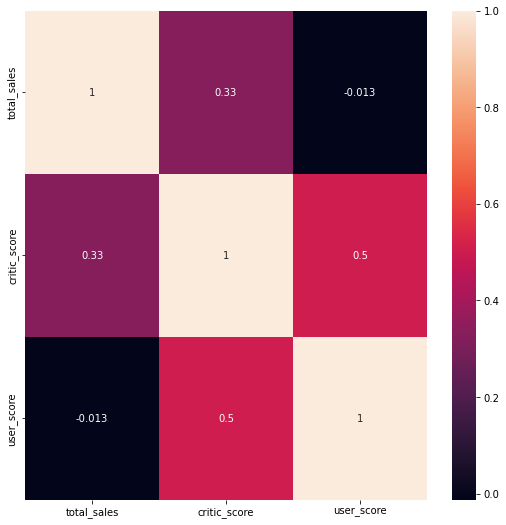

In [37]:
#отбираем только нужные столбцы
data_filtered = new_data[['total_sales' ,'critic_score', 'user_score']]
#выводим график с корреляцией
plt.figure(figsize=(9,9))
sns.heatmap(data_filtered.corr(), annot=True)

plt.show()

По тепловой карте видно, что между оценкой критиков и продажами связь сильнее, чем между оценкой пользователей и продажами. Однако связь не такая уж и сильная (даже скорее слабая, всего 0,33)- ее нельзя считать за показательную.

### Распределение по жанрам
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим, сколько игр приходится на каждый жанр. 

In [38]:
new_data.value_counts('genre') #считаем количество игр по жанрам

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
dtype: int64

Самыми популярными жанрами являются Action, Sports, Misc, Adventure, Role-Playing.<br>
Самыми непопулярными - Strategy, Puzzle, Platform. Вероятно, потому что такие игры требуют большего времени и вникания в процесс.

Посмотрим, сколько приходится продаж на каждый жанр.

In [39]:
#формируем таблицу по жанру и продажам по жанру
new_data.groupby('genre')['total_sales'].sum().to_frame('total_sales') \
    .sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


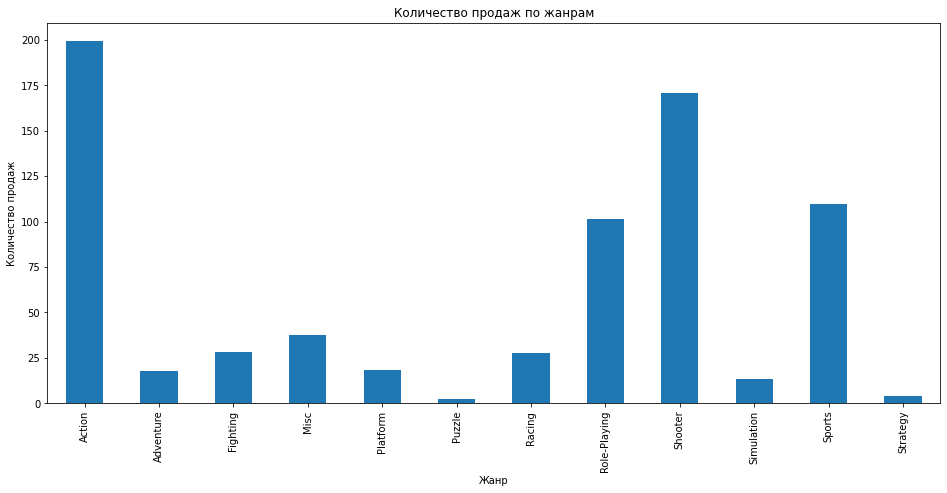

In [40]:
#выводим график
new_data.groupby('genre')['total_sales'].sum().plot(kind='bar', figsize = (16,7))

plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Количество продаж по жанрам')
plt.show()

Посчитаем медианы продаж игр в каждом жанре. Возможно, такие высокие продажи Action и Shooter связаны с выпуском огромного количества дешевых игр. Медиана учитывает не только слишком большие\маленькие значения относительно среднего, но и их количество. Поэтому брать итоговые результаты медианы или среднего более корректно.

In [41]:
new_data.groupby('genre')['total_sales'].median().to_frame('total_sales') \
    .sort_values('total_sales', ascending=False)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Самыми прибыльными жанрами являются 
- Shooter (с большим отрывом)
- Sports
- Platform
- Fighting
- Role-Playing

Самыми неприбыльными являются
- Adventure
- Puzzle
- Strategy

Посмотрим количество и общую сумму продаж для каждого жанра.

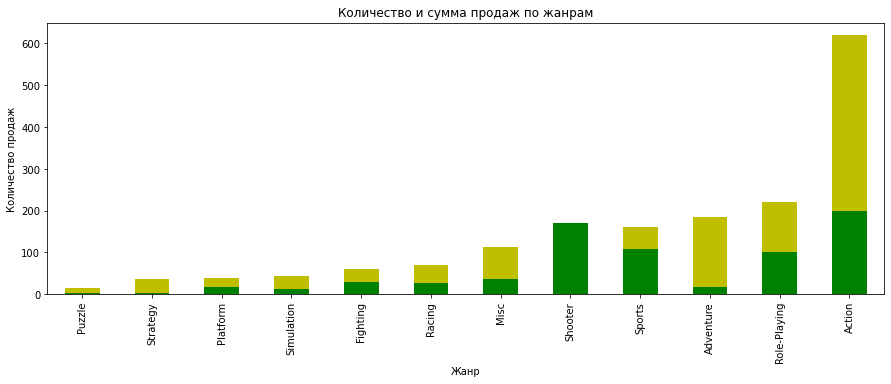

In [42]:
#выводим столбчатую диаграмму
ax = plt.gca()

#новая переменная, где записана группировка по жанру и два столбца: name (количество) и total_sales (сумма)
genre_grouping = new_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name')

#строим график с наложением друг на друга
plot1 = genre_grouping['name']
plot1.plot(kind='bar', figsize=(15,5), color='y')

plot2 = genre_grouping['total_sales']
plot2.plot(kind='bar', figsize=(15,5), color = 'g')

plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Количество и сумма продаж по жанрам')
plt.show()

Игр в жанре "Shooter" в несколько раз меньше, чем игр "Action", однако выручка с них не так сильно различается. Можно сделать вывод, что игры в жанре "Shooter" стабильно гораздо дороже, чем "Action". Что и подтверждает результаты расчетов по медианным продажам.

**Промежуточный вывод:**
В ходе исследовательского анализа было выявлено, что подъем в продаже игр случился после 2002 года, пик пришелся на 2008-2009, а спад начался с 2012 года.

Средняя продолжительность жизни платформы составляет 10 лет, также принято решение учитывать в дальнейшем анализе данные с 2014 по 2016 года (для быстро развивающейся индустрии игр будет верным решением).

Самыми популярными платформами на 2016 год являются PS4, XOne, 3DS, однако и у них наблюдается спад популярности. Предположительно, можно сделать вывод о падении продаж всего рынка игр и потери популярности.

В среднем продажи по платформам 0,35 миллионов копий, также у платформ есть игры, за счет которых платформа и стала доходной, игры, которые дали наибольшую выручку.

Также было выявлено, что оценка экспертов и критиков средне коррелирует с продажами по платформам, а оценка пользователей совсем не имеет связи с продажами. Скорее всего, пользователи опираются на высокие оценки экспертов, покупают игру, затем разочаровываются и ставят низкие оценки. Однако нужно учитывать, что в оценках как критиков, так и пользователей было огромное количество пропусков (>40%), что значительно может влиять на правдоподобность результатов.

Самыми популярными жанрами являются 
- Shooter (с большим отрывом)
- Sports
- Platform
- Fighting
- Role-Playing

Самыми неприбыльными являются

- Adventure
- Puzzle
- Strategy

## Шаг 4. Портрет пользователей по каждому региону

Определим по каждому региону (NA, EU, JP):
- Топ-5 прибыльных платформ;
- Топ-5 пприбыльных жанров;
- Влияение рейтинга ESRB на продажи в регионе.


### Распределение по платформам по регионам

Создадим отдельную таблицу, куда войдут 5 самых прибыльных платформ для Северной Америки

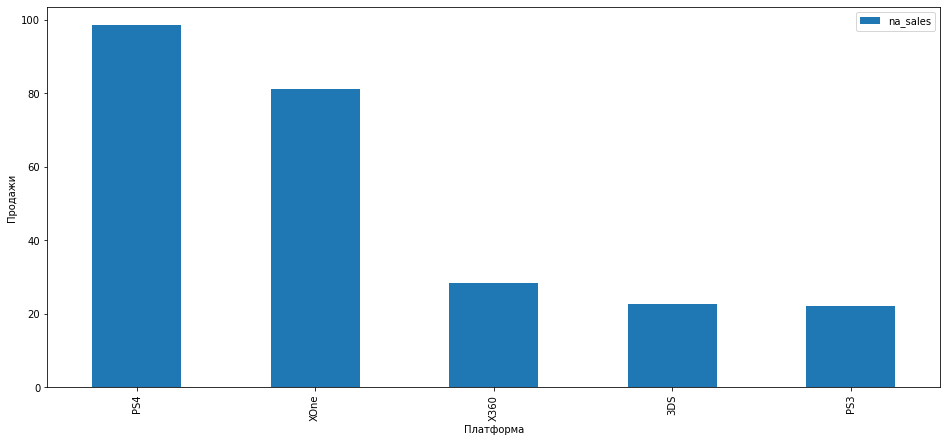

In [43]:
#объявим переменную, где будет сгруппирована таблица по платформе, сумма по столбцу продаж в С.Америке
#первые 5 строк = топ-5
na_platform = new_data.groupby('platform')['na_sales']\
    .sum().to_frame()\
    .sort_values(by='na_sales', ascending=False)\
    .head(5)
#выведем график
na_platform.plot(kind='bar', figsize = (16,7), xlabel='Платформа', ylabel='Продажи')

plt.show()

Самой прибыльной платформой в Северной Америке является **PS4** (98,61 миллионов проданных копий).<br>
На втором месте XOne (81,27 миллионов копий). <br>
На третьем X360 (28,3 миллионов копий). <br>
На четвертом 3DS (22,64 миллионов копий). <br>
На пятом PS3 (22.05 миллионов копий).

Посмотрим то же самое для Европы.

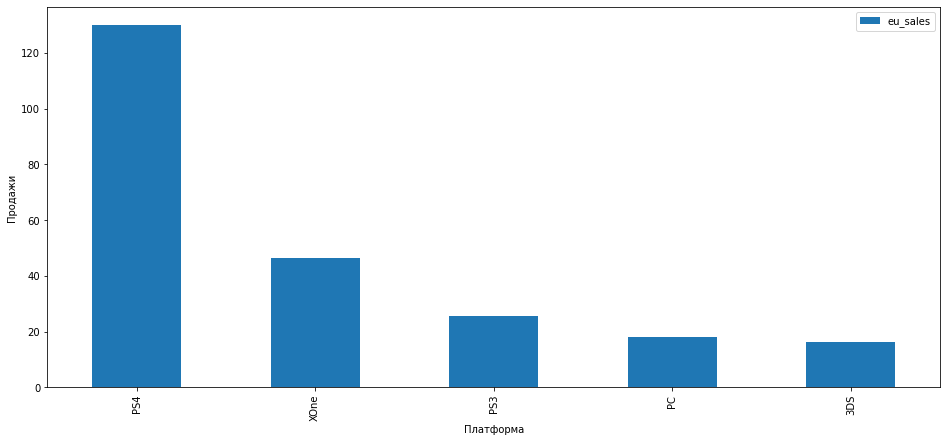

In [44]:
eu_platform = new_data.groupby('platform')['eu_sales']\
    .sum().to_frame()\
    .sort_values(by='eu_sales', ascending=False)\
    .head(5)
eu_platform.plot(kind='bar', figsize = (16,7), xlabel='Платформа', ylabel='Продажи')

plt.show()

Самой прибыльной платформой в Европе является **PS4** (130,04 миллионов проданных копий).<br>
На втором месте X360 (46,25 миллионов копий). <br>
На третьем PS3 (25,54 миллионов копий). <br>
На четвертом PC (17,97 миллионов копий). <br>
На пятом 3DS (16,12 миллионов копий).

Посмотрим то же самое для Японии.

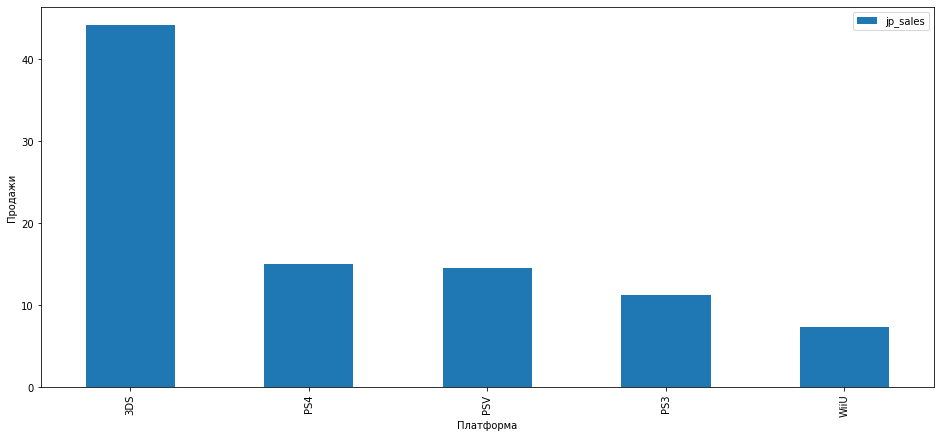

In [45]:
jp_platform = new_data.groupby('platform')['jp_sales']\
    .sum().to_frame()\
    .sort_values(by='jp_sales', ascending=False)\
    .head(5)
jp_platform.plot(kind='bar', figsize = (16,7), xlabel='Платформа', ylabel='Продажи')

plt.show()

Самой прибыльной платформой в Японии является **3DS** (44,24 миллионов проданных копий). <br>
На втором месте PS4 (15,02 миллионов копий).<br>
На третьем PSV (14,54 миллионов копий).<br>
На четвертом PS3 (11,22 миллионов копий).<br>
На пятом WiiU (7,31 миллионов копий).

Можно сделать вывод, что в Японии чаще играют на старых платформах, нежели на новых.

Сформируем сводную таблицу, где будут все топовые платформы по регионам, чтобы на графике посмотреть продажи.

In [46]:
#объявим переменную, куда запишем сводную таблицу по всем платформам, учитывая все пропуски
na_eu_platform = na_platform.merge(eu_platform, on='platform', how='outer')
na_eu_jp_platform = na_eu_platform.merge(jp_platform, on='platform', how='outer')
na_eu_jp_platform

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,NaN
X360,28.30,NaN,NaN
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22
PC,NaN,17.97,NaN
PSV,NaN,NaN,14.54
WiiU,NaN,NaN,7.31


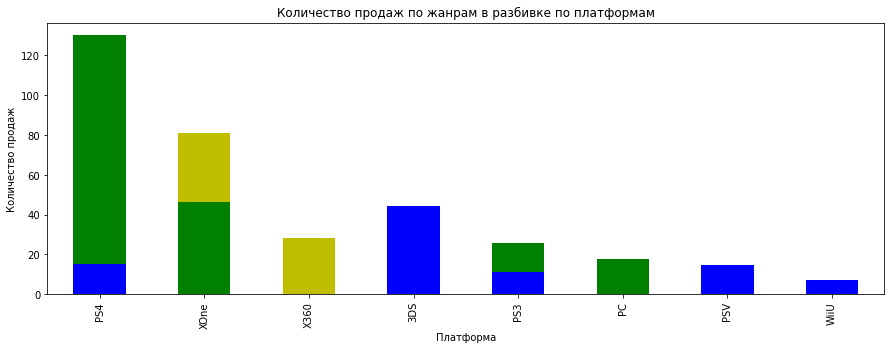

In [47]:
#строим график с наложением друг на друга
plot1 = na_eu_jp_platform['na_sales']
plot1.plot(kind='bar', figsize=(15,5), color='y') #Северная Америка

plot2 = na_eu_jp_platform['eu_sales']
plot2.plot(kind='bar', figsize=(15,5), color = 'g') #Европа

plot2 = na_eu_jp_platform['jp_sales']
plot2.plot(kind='bar', figsize=(15,5), color = 'b') #Япония

plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Количество продаж по жанрам в разбивке по платформам')
plt.show()

Самым прибыльным регионом является Северная Америка - там суммарно больше всего продаж по топовым платформам, значит в этом регионе хороший спрос на игры и популярен этот вид досуга. В Европе спрос немного ниже. <br>
На графике заметно, что продажи в Японии гораздо ниже продаж в Северной Америке и Европе, можно сделать вывод о непопулярности такого вида досуга, как игры. Также в Японии популярны не те же самые платформы, что в Европе и Америке.<br>
Возможно, на это влияет особенности в переводе игр на разные языки - для европейцев легче играть на английском яызке (как в Северной Америке), чем японцам.

### Распределение по жанрам по регионам
Рассмотрим топ-5 самых прибыльных жанров по регионам.

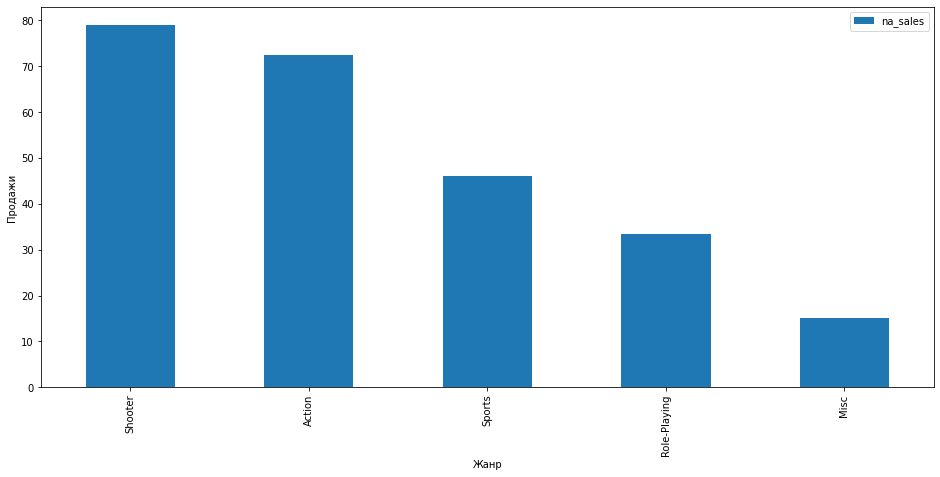

In [48]:
#объявим переменную, куда запишем сгруппированную таблицу по жанру, суммированный столбец продаж, первые 5 строк
na_genre = new_data.groupby('genre')['na_sales']\
    .sum().to_frame()\
    .sort_values(by='na_sales', ascending=False)\
    .head(5)
na_genre.plot(kind='bar', figsize = (16,7), xlabel='Жанр', ylabel='Продажи')

plt.show()

Самыми популярными жанрами в Северной Америке являются:
- Shooter (79,02)
- Action (72,53)
- Sports (46,13)
- Role-Playing (33,47)
- Misc (15,05)

Такое распределение очень схоже с общим распределением по датасету.

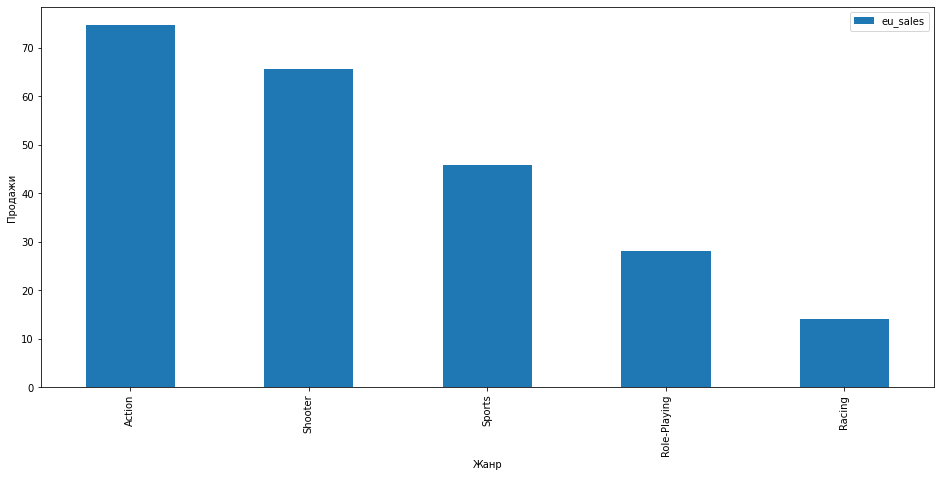

In [49]:
eu_genre = new_data.groupby('genre')['eu_sales']\
    .sum().to_frame()\
    .sort_values(by='eu_sales', ascending=False)\
    .head(5)
eu_genre.plot(kind='bar', figsize = (16,7), xlabel='Жанр', ylabel='Продажи')

plt.show()

Самыми популярными жанрами в Европе являются:
- Action (74,68)
- Shooter (65,52)
- Sports (45,73)
- Role-Playing (28,17)
- Racing (14,13)

Выручка по Европе ниже, чем в Америке, но жанры совпадают.

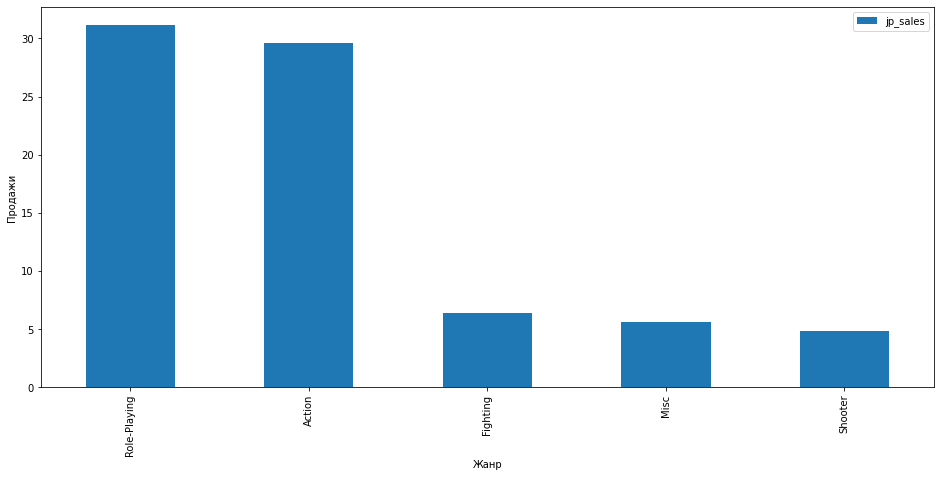

In [50]:
jp_genre = new_data.groupby('genre')['jp_sales']\
    .sum().to_frame()\
    .sort_values(by='jp_sales', ascending=False)\
    .head(5)
jp_genre.plot(kind='bar', figsize = (16,7), xlabel='Жанр', ylabel='Продажи')

plt.show()

Самыми популярными жанрами в Японии являются:
- Role-Playing (31,16)
- Action (29.58)
- Fighting	(6.37)
- Misc	(5.61)
- Shooter	(4.87)

На первом месте с большим отрывом в Японии Role-Playing, так же в топ попал жанр Fighting. Как и с платформами, в Японии продажи по жанрам различаются с Европой и Америкой. Выручка также ниже.

Построим сводную таблицу и диаграмму по ней.

In [51]:
#Сводная таблица, где будут все жанры
na_eu_genre = na_genre.merge(eu_genre, on='genre', how='outer')
na_eu_jp_genre = na_eu_genre.merge(jp_genre, on='genre', how='outer')
na_eu_jp_genre

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,NaN
Role-Playing,33.47,28.17,31.16
Misc,15.05,NaN,5.61
Racing,NaN,14.13,NaN
Fighting,NaN,NaN,6.37


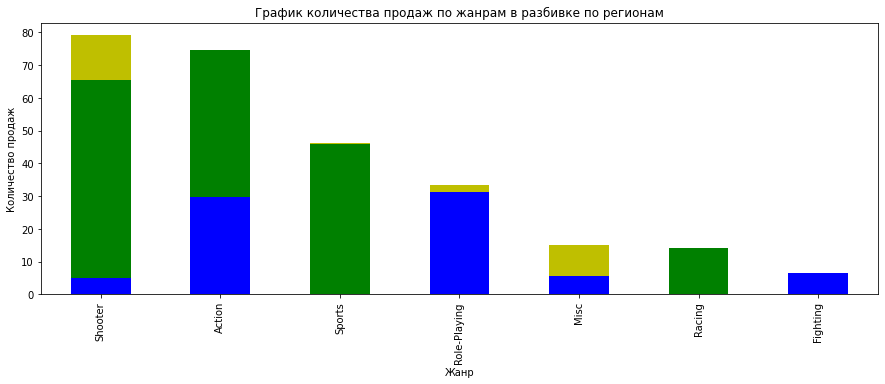

In [52]:
#строим график с наложением друг на друга
plot1 = na_eu_jp_genre['na_sales']
plot1.plot(kind='bar', figsize=(15,5), color='y')

plot2 = na_eu_jp_genre['eu_sales']
plot2.plot(kind='bar', figsize=(15,5), color = 'g')

plot2 = na_eu_jp_genre['jp_sales']
plot2.plot(kind='bar', figsize=(15,5), color = 'b')

plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('График количества продаж по жанрам в разбивке по регионам')
plt.show()

В Америке самые высокие продажи по жанрам, Европа немного отстает, но в Европе популярны те же самые жанры.<br>
По графику видно, что как и в ситуации с платформами, в Японии популярны другие жанры, в сравнении с Европой и Америкой. Можно предположить, что это связано с менталитетом японцев.

### Влияние ESRB на продажи в регионе
Оценим, есть ли влияние рейтинга ESRB на продажи игр по регионам.

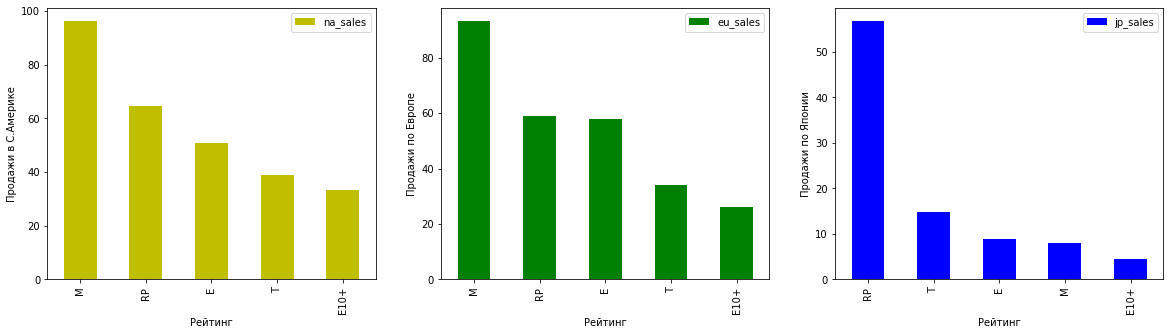

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(20,5)) #зададим сетку

#строим графики по рейтингу и продажам в регионе

#Северная Америка
na_rating = new_data.groupby('rating')['na_sales']\
    .sum().to_frame()\
    .sort_values(by='na_sales', ascending=False)\
    .head(5)
na_rating.plot(kind='bar', xlabel='Рейтинг', ylabel='Продажи в С.Америке', ax=axes[0], color='y')

#Европа
eu_rating = new_data.groupby('rating')['eu_sales']\
    .sum().to_frame()\
    .sort_values(by='eu_sales', ascending=False)\
    .head(5)
eu_rating.plot(kind='bar', xlabel='Рейтинг', ylabel='Продажи по Европе', ax=axes[1], color='g')

#Япония
jp_rating = new_data.groupby('rating')['jp_sales']\
    .sum().to_frame()\
    .sort_values(by='jp_sales', ascending=False)\
    .head(5)
jp_rating.plot(kind='bar', xlabel='Рейтинг', ylabel='Продажи по Японии', ax=axes[2], color='b')

plt.show()

По графикам видно, что в Америке самый продаваемый жанр `M`, далее идут `RP`, `E`, `T`, `E10+`.
В Европе продажи ожидаемо ниже, самый продаваемый жанр также `M`, `RP`, `E`, `T`, `E10+`.
В Японии продажи еще гораздо ниже, лидером является рейтинг "без рейтинга" - `RP`. В этом столбце были пропущенные значения, которые мы заменили на "RP". Соответственно, можно сделать вывод, что в Японии не смотрят на рейтинг при покупке, покупают все равно, даже если рейтинг отсутствует.

Стоит также отметить, что в столбце `rating` было большое количество пропусков - результаты могут не отражать реальную картину.

**Промежуточный вывод:**
В Северной Америке самой прибыльной платформой является PS4, далее идут XOne, X360, 3DS, PS3. Самыми популярными жанрами являются Shooter, Action, Sports, Role-Playing, Misc.

В Европе ситуация по топ-5 платформ и жанрам не сильно отличается от Америки. Топ-5 платформ: PS4, X360, PS3, PC, 3DS. Топ-5 жанров: Action, Shooter, Sports, Role-Playing. Racing.

В Японии топы различаются кардинально. Топ платформ: 3DS, PS4, PSV, PS3, WiiU. Топ жанров: Role-Playing, Action, Fighting, Misc, Shooter. В Японии приветствуются другие жанры, чем в Европе и Америке, используются старые платформы.

Самая высокая доля продаж принадлежит Северной Америке, далее ненамного меньше идет Европа, а самые малые продажи показывает Япония.

Рейтинг ESRB пользуется популярностью в Америке и Европе: чаще всего игры покупают в жанре "M", "E", "T". В Японии же не слишком ориентируются на рейтинг - больше всего продаж именно у игр либо без рейтинга ESRB, либо у игр, чей рейтинг еще в процессе оценивания.

Стоит также отметить, что в столбце rating было большое количество пропусков - результаты могут не отражать реальную картину.

## Шаг 5. Проверка гипотез

Проверим несколько гипотез:

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0: Средние пользовательские рейтинги XOne и PC равны <br>
Н1: Средние пользовательские рейтинги XOne и PC отличаются

Для этого нужно посчитать средний рейтинг `user_score` для `XOne` и `PC`.

In [61]:
#выборка по платформе 
sample_XOne = new_data.query("platform == 'XOne' & user_score > 0")['user_score']
sample_PC = new_data.query("platform == 'PC' & user_score > 0")['user_score']
alpha = .05 #уровень значимости

results = st.ttest_ind(
        sample_XOne,
        sample_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Мы не использовали дополнительный параметр `equal_var = False`, потому что у нас достаточно большие и одинаковые по размеру выборки — нет оснований полагать, что разброс будет сильно отличаться.
Зачение `p-value` = 10%. 

Посмотрим, в какую сторону отклонение.

In [55]:
print('Средняя пользовательская оценка для Xbox One', sample_XOne.mean())
print('Средняя пользовательская оценка для PC', sample_PC.mean())

Средняя пользовательская оценка для Xbox One 6.594545454545453
Средняя пользовательская оценка для PC 6.298360655737703


Игры на Xbox One оценивают выше, но не намного. 

### Средние пользовательские рейтинги жанров Action и Sports разные

Н0: Средние пользовательские рейтинги жанров Action и Sports равны <br>
Н1: Средние пользовательские рейтинги жанров Action и Sports отличаются

In [56]:
sample_action = new_data.query("genre == 'Action' & user_score > 0")['user_score']
sample_sports = new_data.query("genre == 'Sports' & user_score > 0")['user_score']
alpha = .05

results = st.ttest_ind(
        sample_action,
        sample_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Мы не использовали дополнительный параметр `equal_var = False`, потому что у нас достаточно большие и одинаковые по размеру выборки — нет оснований полагать, что разброс будет сильно отличаться. Зачение `p-value` = 0.000000002871%.

Посмотрим, в какую сторону отклонение.

In [57]:
print('Средняя пользовательская оценка для Action', sample_action.mean())
print('Средняя пользовательская оценка для Sports', sample_sports.mean())

Средняя пользовательская оценка для Action 6.760606060606054
Средняя пользовательская оценка для Sports 5.225196850393697


Игры в жанре Action оценивают лучше Sports.

Таким образом, можно утверждать, что *Средние пользовательские рейтинги XOne и PC равны* и *Средние пользовательские рейтинги жанров Action и Sports отличаются*.

## Шаг 6. Общий вывод



Целью проекта являлось определение закономерностей, влияющих на успешность игры.

**Предобработка**<br>
В нашем распоряжении был датасет с 16715 играми на разных платформах. В ходе предобработки данных (замена названий столбцов, изменение типов данных, обработки прпоусков и добавлении нового столбца суммарных продаж по регионам) были удалена 271 значение без года выпуска игры (1,6% таблицы), обработаны значения в столбце с рейтингом ESRB, обработан столбец с пользовательскими оценками, а также добавлен столбец с суммарными продажами.

**Исследовательский анализ**<br>
В ходе исследовательского анализа было выявлено, что подъем рынка игровой индустрии пришелся на 2002 год, пик 2008-2009 года, а спад с 2012 года. Жизненный цикл платформы составляет 10 лет. Самыми популярными платформами являются PS4, XOne и 3DS, однако и они находятся в стадии спада прибыльности. В среднем продажи по платформам составляют 0,35 миллионов копий. Была выявлена средняя положительная связь между оценкой экспертов и продажами.

Самыми прибыльными жанрами являются

    Shooter, Sports, Platform, Fighting, Role-Playing.

Самыми неприбыльными
    Strategy, Puzzle, Adventure.

Однако нужно учитывать, что в оценках как критиков, так и пользователей было огромное количество пропусков (~50%), что значительно может влиять на правдоподобность результатов.

**По разбивке по регионам было выявлено следующее:**
В Северной Америке самой прибыльной платформой является PS4, далее идут XOne, X360, 3DS, PS3. Самыми популярными жанрами являются Shooter, Action, Sports, Role-Playing, Misc.

В Европе ситуация по топ-5 платформ и жанрам не сильно отличается от Америки. Топ-5 платформ: PS4, X360, PS3, PC, 3DS. Топ-5 жанров: Action, Shooter, Sports, Role-Playing. Racing.

В Японии топы различаются кардинально. Топ платформ: 3DS, PS4, PSV, PS3, WiiU. Топ жанров: Role-Playing, Action, Fighting, Misc, Shooter.  В Японии приветствуются другие жанры, чем в Европе и Америке, используются старые платформы.

**Самая высокая доля продаж** принадлежит Северной Америке, далее немного меньше идет Европа, а самые малые продажи показывает Япония.

Рейтинг организации ESRB влияет на продажи игры в Северной Америке и Европе, и не влияет в Японии.

Также при проверке гипотез было выявлено, что Средние пользовательские рейтинги XOne и PC равны и Средние пользовательские рейтинги жанров Action и Sports отличаются.

**Что касается цели проекта:** больше всего на продажи игры влияют жанр и платформа, на которой была выпущена игра. Нужно учитывать целевую аудиторию выпускаемой игры: страны Северной Америки, Европы, Япония или другие, так как от этого зависит прибыльность жанра выпускаемой игры.

- Для Северной Америки самой прибыльной игрой была бы: игра в жанре Shooter, выпущенная на PS4, с рейтингом "M".

- Для Европы: игра в жанре Action, выпущенная на PS4, с рейтингом "M".

- Для Японии: игра в жанре Role-Playing на 3DS.

В целом, состояние рынка игровой индустрии постепенно идет на спад, игры больше не пользуются такой популярностью, как в 2006-2010 годах, это может быть связано с экономическими кризисами, психологическим состоянием населения, а также с развитием других сфер проведения досуга.